## 1. Постановка задачи


Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.
Заранее импортируем модули, которые нам понадобятся для решения задачи:


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

from scipy.stats import normaltest
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

Прочитаем наш файл с исходными данными:

In [71]:
# для google.colab
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [72]:
taxi_data = pd.read_csv(
    "train.csv", encoding="ISO-8859-1")
#taxi_data = pd.read_csv("https://drive.google.com/file/d/1gMlqlpgdjV0J6UPaopx7jRBu4eJ1tqHb/view?usp=drive_open")
#print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [73]:
#сделаем копию данных
data = taxi_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [74]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
data["pickup_datetime"].describe()

/var/folders/88/7g79gm9d45d4lvwr8s3qk3jm0000gn/T/ipykernel_16621/491274464.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data["pickup_datetime"].describe()


count                 1458644
unique                1380222
top       2016-03-04 08:07:34
freq                        5
first     2016-01-01 00:00:17
last      2016-06-30 23:59:39
Name: pickup_datetime, dtype: object

### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [75]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [76]:
print('Количество уникальных таксопарков {:.0f}'.format(len(data['vendor_id'].unique())))    #а
print('Максимальное количество пассажиров {:.0f}'.format(len(data.value_counts(['passenger_count']))))   #б
print('Средняя длительность поездки {:.0f}'.format(round(data["trip_duration"].mean())))   #в
print('Медианная длительность поездки {:.0f}'.format(round(data["trip_duration"].median())))   #в
print('Минимальная длительность поездки {:.0f}'.format(data["trip_duration"].min()))   #г
print('Максимальная длительность поездки {:.0f}'.format(data["trip_duration"].max()))   #г

Количество уникальных таксопарков 2
Максимальное количество пассажиров 10
Средняя длительность поездки 959
Медианная длительность поездки 662
Минимальная длительность поездки 1
Максимальная длительность поездки 3526282


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [77]:
def add_datetime_features(data):
    data["pickup_date"] = data["pickup_datetime"].dt.date
    data["pickup_hour"] = data["pickup_datetime"].dt.hour
    data["pickup_day_of_week"] = data["pickup_datetime"].dt.day_name()
    return data

data = add_datetime_features(data)   #применим функцию

In [78]:
print('Поездки по дням недели ')    #а
print((data["pickup_day_of_week"].value_counts(sort=True)))
print('Среднее количество поездок в день {:.1f}'.format(round(data["pickup_date"].value_counts().mean())))   #б

Поездки по дням недели 
Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day_of_week, dtype: int64
Среднее количество поездок в день 8015.0


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [79]:
holidays = pd.read_csv('holiday_data.csv', sep=';')

def add_holiday_features(data, holidays):
    holidays["date"] = pd.to_datetime(holidays["date"])
    holidays["date"]= holidays["date"].dt.date
    holidays["is_holiday"] = 1
    data = pd.merge(data, holidays, left_on="pickup_date", right_on="date", how="left")
    data["pickup_holiday"] = data["is_holiday"].fillna(0)
    data = data.drop(columns=["date", "is_holiday", "day", "holiday"])  ##
    return data

data = add_holiday_features(data, holidays)

In [80]:
data["pickup_holiday"].value_counts()
#holidays.info()

0.0    1407522
1.0      51122
Name: pickup_holiday, dtype: int64

In [81]:
holiday_duration = data.groupby(['pickup_holiday'])['trip_duration'].median()[1]
print('медианная длительность поездки на такси в праздничные дни {:.0f}'.format(holiday_duration))

медианная длительность поездки на такси в праздничные дни 585


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [82]:
osrm_data = pd.read_csv('osrm_data_train.csv')
osrm_data = osrm_data[['id', 'total_distance','total_travel_time', 'number_of_steps']]

In [83]:
def  add_osrm_features(data, osrm_data):
    data = pd.merge(data, osrm_data, left_on="id", right_on="id", how="left")
    #data["pickup_holiday"] = data["is_holiday"].fillna(0)
    #data = data.drop(columns=["date", "is_holiday", "day"])
    return data

data =  add_osrm_features(data, osrm_data)

In [84]:
duration = data['trip_duration'].median()
print('медианная длительность поездки на такси {:.0f}'.format(duration))
duration_OSRM = data['total_travel_time'].median()
print('медианная длительность поездки на такси OSRM {:.0f}'.format(duration_OSRM))
print('разница в длительности поездки {:.0f}'.format(duration - duration_OSRM))

медианная длительность поездки на такси 662
медианная длительность поездки на такси OSRM 290
разница в длительности поездки 372


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [86]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [87]:
def add_geographical_features(data):
    lat1 = data['pickup_latitude']
    lng1 = data['pickup_longitude']
    lat2 = data['dropoff_latitude']
    lng2 = data['dropoff_longitude']
    #data2 = pd.DataFrame()
    data['haversine_distance'] =  get_haversine_distance(lat1, lng1, lat2, lng2)
    data['direction'] = get_angle_direction(lat1, lng1, lat2, lng2)
    return data

In [88]:
data = add_geographical_features(data)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [90]:
h_dist_m = data['haversine_distance'].median()
print('медианное расстояние Хаверсина поездок равно {:.0f}'.format(round(h_dist_m, 2)))

медианное расстояние Хаверсина поездок равно 2


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [91]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((data[['pickup_latitude', 'pickup_longitude']],
                    data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [92]:
def add_cluster_features(data, kmeans):
    X = coords
    # Добавляем столбец с кластерами в DataFrame
    data['geo_cluster'] = kmeans.predict(X)
    return data

In [93]:
data = add_cluster_features(data,kmeans)

In [94]:
data['geo_cluster'].value_counts()

1    592117
0    392108
6    340489
8     45518
4     40234
5     32799
7     15355
9        18
3         4
2         2
Name: geo_cluster, dtype: int64

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [96]:
weather_data = pd.read_csv('weather_data.csv')

In [97]:
weather_data.head()

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31,6


In [98]:
weather_data['events'].value_counts()

None    8332
Rain     379
Snow      74
Fog        2
Name: events, dtype: int64

In [99]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8787 non-null   object 
 1   temperature  8787 non-null   float64
 2   windchill    2295 non-null   float64
 3   heat index   815 non-null    float64
 4   humidity     8787 non-null   float64
 5   pressure     8556 non-null   float64
 6   dew Point    8787 non-null   float64
 7   visibility   8787 non-null   float64
 8   wind dir     8787 non-null   object 
 9   wind speed   8787 non-null   float64
 10  gust speed   8787 non-null   float64
 11  precip       8787 non-null   float64
 12  events       8787 non-null   object 
 13  conditions   8787 non-null   object 
 14  date         8787 non-null   object 
 15  hour         8787 non-null   int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 1.1+ MB


In [100]:
def add_weather_features(data, weather_data):
    # преобразуем столбец time в тип datetime и извлекаем дату и час
    weather_data['time'] = pd.to_datetime(weather_data['time'])
    weather_data['date'] = weather_data['time'].dt.date
    weather_data['hour'] = weather_data['time'].dt.hour

    # удаляем неинтересующие нас столбцы из dataframe weather_data
    weather_data = weather_data[[ 'date', 'hour', 'temperature', 'visibility','wind speed', 'precip', 'events']]
    #weather_data = weather_data.drop(['time', 'windchill', 'heat index', 'humidity', 'pressure', 'dew Point','wind dir'], axis=1)

    # объединяем dataframe 'data' с weather_data по столбцам даты и часа
    #data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
    #data['pickup_date'] = data['pickup_datetime'].dt.date
    #data['pickup_hour'] = data['pickup_datetime'].dt.hour
    data = pd.merge(data, weather_data, left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'], how='left')

    # удаляем столбцы date и hour
    data = data.drop(['date', 'hour'], axis=1)

    return data

In [101]:
data = add_weather_features(data, weather_data)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [103]:
data['events'].value_counts()

None    1375185
Rain      58300
Snow      13126
Fog           1
Name: events, dtype: int64

Доля (в процентах) в общем количестве наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями

In [104]:
print((1458644-1446612)/1458644*100)

0.8248757064780714


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [105]:
def fill_null_weather_data(data):
    data['temperature'] = data['temperature'].fillna(
        data.groupby('pickup_date')['temperature'].transform('median'))
    data['visibility'] = data['visibility'].fillna(
        data.groupby('pickup_date')['visibility'].transform('median'))
    data['wind speed'] = data['wind speed'].fillna(
        data.groupby('pickup_date')['wind speed'].transform('median'))
    data['precip'] = data['precip'].fillna(
        data.groupby('pickup_date')['precip'].transform('median'))

    data.loc[(data['events'].isnull()==True),'events']= 'None'
    data.loc[(data['total_distance'].isnull()==True),'total_distance']= data['total_distance'].median()
    data.loc[(data['total_travel_time'].isnull()==True),'total_travel_time']= data['total_travel_time'].median()
    data.loc[(data['number_of_steps'].isnull()==True),'number_of_steps']= data['number_of_steps'].median()

    return data

In [106]:
data = fill_null_weather_data(data)

In [107]:
data['events'].value_counts()

None    1387217
Rain      58300
Snow      13126
Fog           1
Name: events, dtype: int64

In [108]:
data['temperature'].median()

11.1

In [109]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        0
total_travel_time     0
number_of_steps       0
haversine_distance    0
direction             0
geo_cluster           0
temperature           0
visibility            0
wind speed            0
precip                0
events                0
dtype: int64

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


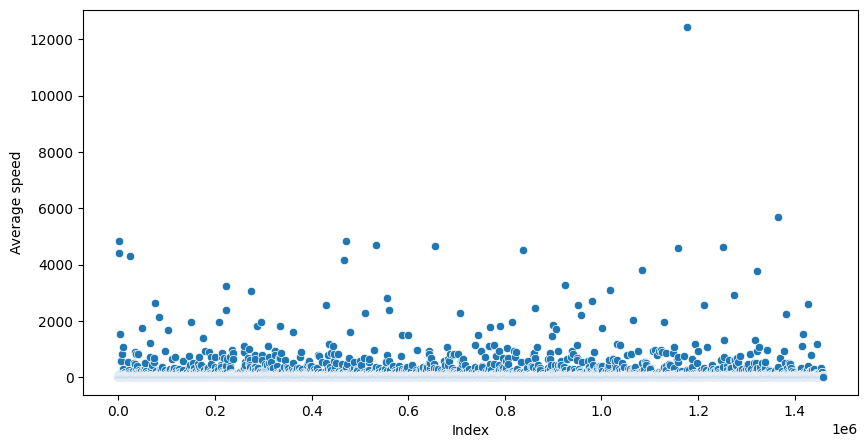

In [111]:
avg_speed = data['total_distance'] / data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [112]:
data[data['trip_duration'] > 86400].count()   #количество выбросов выше 24 часов

id                    4
vendor_id             4
pickup_datetime       4
dropoff_datetime      4
passenger_count       4
pickup_longitude      4
pickup_latitude       4
dropoff_longitude     4
dropoff_latitude      4
store_and_fwd_flag    4
trip_duration         4
pickup_date           4
pickup_hour           4
pickup_day_of_week    4
pickup_holiday        4
total_distance        4
total_travel_time     4
number_of_steps       4
haversine_distance    4
direction             4
geo_cluster           4
temperature           4
visibility            4
wind speed            4
precip                4
events                4
dtype: int64

In [113]:
#отфильтруем данные по продолжительности менее 24 часов
data = data[data['trip_duration'] < 86400]

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458640 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458640 non-null  object        
 1   vendor_id           1458640 non-null  int64         
 2   pickup_datetime     1458640 non-null  datetime64[ns]
 3   dropoff_datetime    1458640 non-null  object        
 4   passenger_count     1458640 non-null  int64         
 5   pickup_longitude    1458640 non-null  float64       
 6   pickup_latitude     1458640 non-null  float64       
 7   dropoff_longitude   1458640 non-null  float64       
 8   dropoff_latitude    1458640 non-null  float64       
 9   store_and_fwd_flag  1458640 non-null  object        
 10  trip_duration       1458640 non-null  int64         
 11  pickup_date         1458640 non-null  object        
 12  pickup_hour         1458640 non-null  int64         
 13  pickup_day_o

In [115]:
data['avg_speed'] =  avg_speed

In [116]:
#отфильтруем данные по ср.скорости менее 300 км/ч
data = data[data['avg_speed'] < 300]
data = data.drop(columns=['avg_speed'])   ##

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  int64         
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   dropoff_datetime    1458233 non-null  object        
 4   passenger_count     1458233 non-null  int64         
 5   pickup_longitude    1458233 non-null  float64       
 6   pickup_latitude     1458233 non-null  float64       
 7   dropoff_longitude   1458233 non-null  float64       
 8   dropoff_latitude    1458233 non-null  float64       
 9   store_and_fwd_flag  1458233 non-null  object        
 10  trip_duration       1458233 non-null  int64         
 11  pickup_date         1458233 non-null  object        
 12  pickup_hour         1458233 non-null  int64         
 13  pickup_day_o

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [118]:
data['trip_duration_log'] = np.log(data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

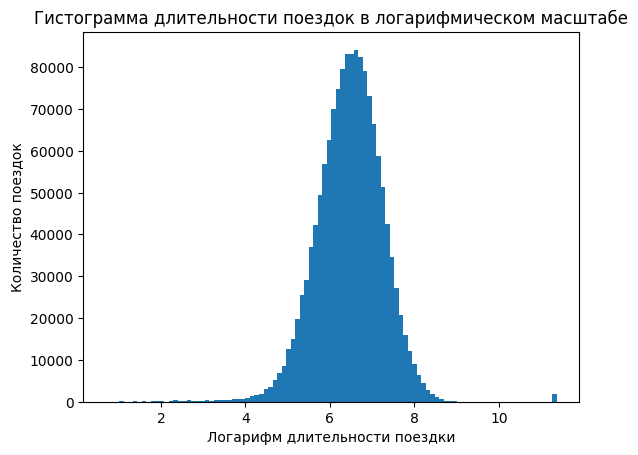

In [119]:
# построение гистограммы
plt.hist(data["trip_duration_log"], bins=100)
plt.title("Гистограмма длительности поездок в логарифмическом масштабе")
plt.xlabel("Логарифм длительности поездки")
plt.ylabel("Количество поездок")
plt.show()

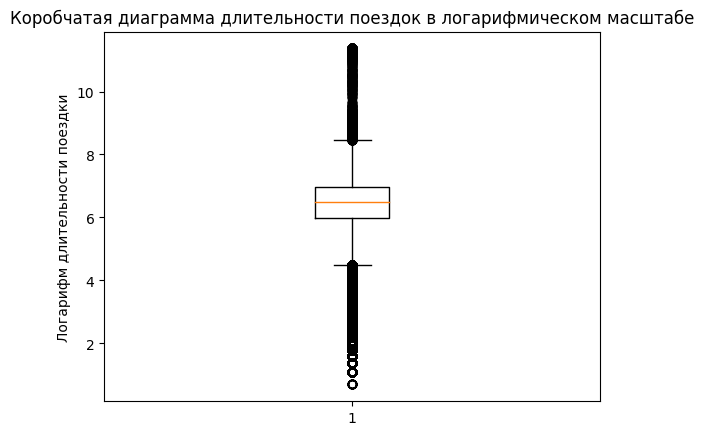

In [120]:
# построение коробчатой диаграммы
plt.boxplot(data["trip_duration_log"])
plt.title("Коробчатая диаграмма длительности поездок в логарифмическом масштабе")
plt.ylabel("Логарифм длительности поездки")
plt.show()

In [121]:
# тест Д’Агостино на нормальность распределения
stat, p = normaltest(data["trip_duration_log"])
alpha = 0.05
if p < alpha:
    print("Нулевая гипотеза отвергается, распределение не является нормальным")
else:
    print("Нулевая гипотеза не отвергается, распределение может быть нормальным")

Нулевая гипотеза отвергается, распределение не является нормальным


In [122]:
#Чему равен вычисленный p-value?
print("p-value =", p)

p-value = 0.0


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

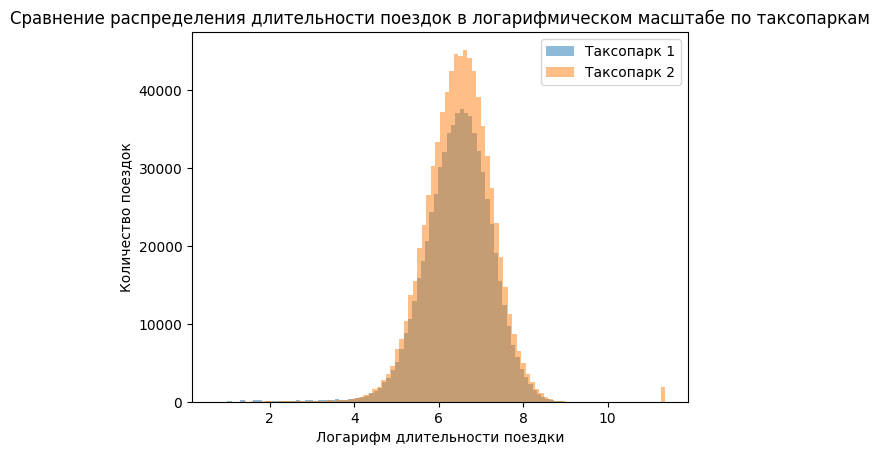

In [123]:
data.groupby("vendor_id")["trip_duration_log"].plot(kind="hist", bins=100, alpha=0.5, legend=True)

# настройка графика
plt.title("Сравнение распределения длительности поездок в логарифмическом масштабе по таксопаркам")
plt.xlabel("Логарифм длительности поездки")
plt.ylabel("Количество поездок")
plt.legend(["Таксопарк 1", "Таксопарк 2"])
plt.show()

In [124]:
#Распределения в группах практически не отличаются,
#признак vendor_id не имеет значения при определении длительности поездки.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

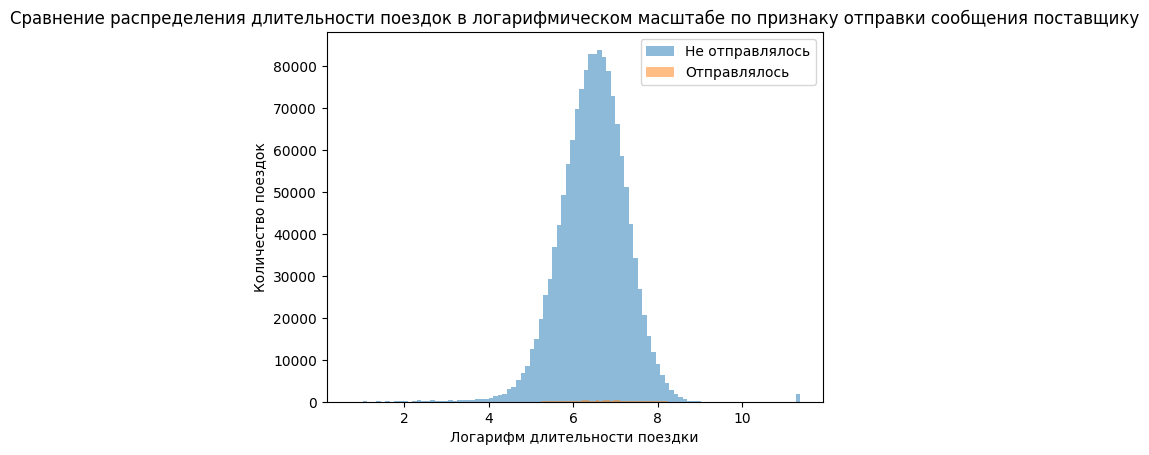

In [125]:
# построение гистограммы для каждого значения признака
data.groupby("store_and_fwd_flag")["trip_duration_log"].plot(kind="hist", bins=100, alpha=0.5, legend=True)

# настройка графика
plt.title("Сравнение распределения длительности поездок в логарифмическом масштабе по признаку отправки сообщения поставщику")
plt.xlabel("Логарифм длительности поездки")
plt.ylabel("Количество поездок")
plt.legend(["Не отправлялось", "Отправлялось"])
plt.show()

In [126]:
#Распределения в группах значительно отличаются,
#признак store_and_fwd_flag имеет значение при определении длительности поездки.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

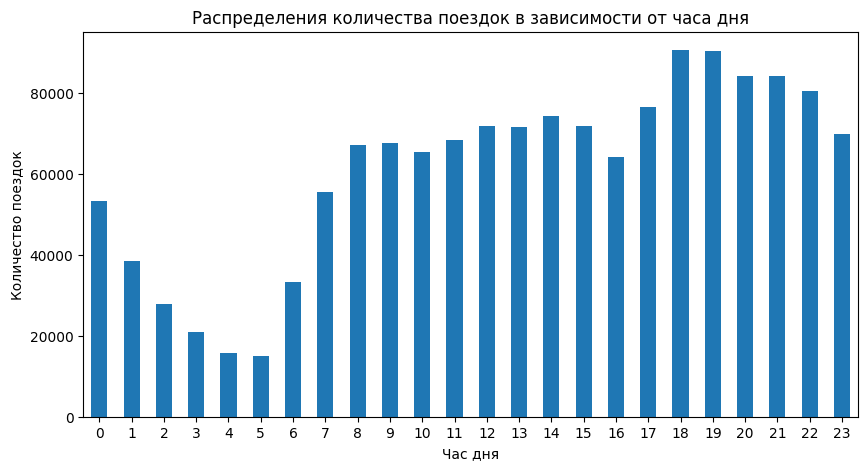

In [127]:
# создание графика распределения количества поездок в зависимости от часа дня
plt.figure(figsize=(10,5))
data.groupby("pickup_hour")["id"].count().plot(kind="bar",  rot=0)
plt.title("Распределения количества поездок в зависимости от часа дня")
plt.xlabel("Час дня")
plt.ylabel("Количество поездок")
plt.show()

#такси заказывают реже всего с 00:00 по 5:00

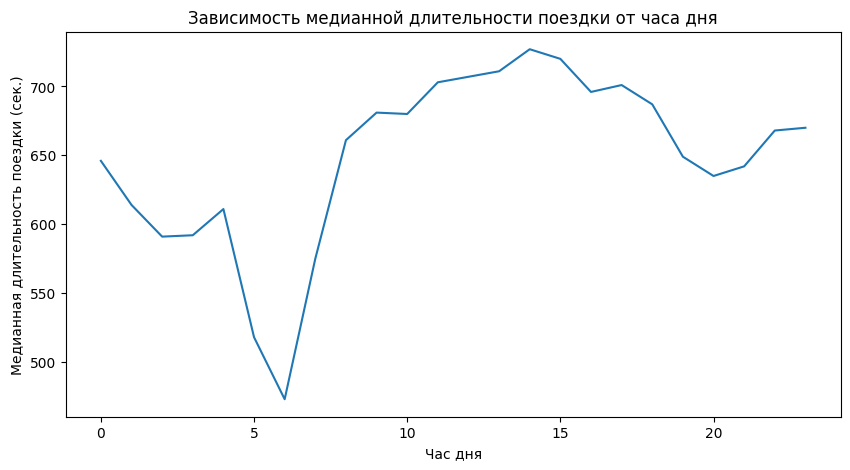

In [128]:
# создание графика зависимости медианной длительности поездки от часа дня
plt.figure(figsize=(10,5))
data.groupby("pickup_hour")["trip_duration"].median().plot(kind="line")
plt.title("Зависимость медианной длительности поездки от часа дня")
plt.xlabel("Час дня")
plt.ylabel("Медианная длительность поездки (сек.)")
plt.show()

#время суток наблюдается пик медианной длительности поездок с 13:00 по 18:00

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


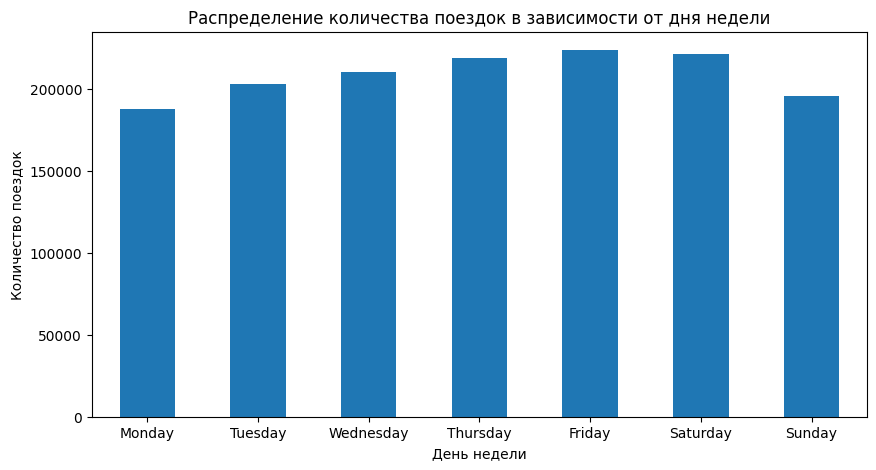

In [129]:
# создание графика распределения количества поездок в зависимости от дня недели
plt.figure(figsize=(10,5))
data.groupby("pickup_day_of_week")["id"].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind="bar",  rot=0)
plt.title("Распределение количества поездок в зависимости от дня недели")
plt.xlabel("День недели")
plt.ylabel("Количество поездок")
plt.show()

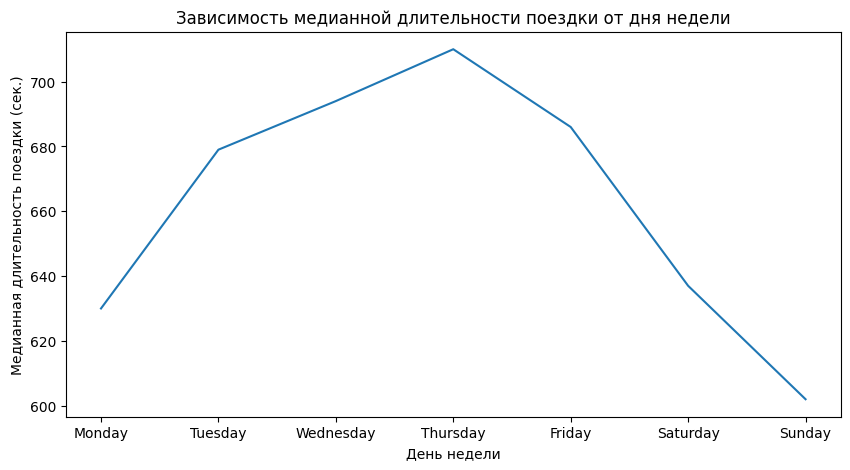

In [130]:
# создание графика зависимости медианной длительности поездки от дня недели
plt.figure(figsize=(10,5))
#data.groupby("pickup_day_of_week")["trip_duration"].median().plot(kind="line")
data.groupby("pickup_day_of_week")["trip_duration"].median().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind="line")
plt.title("Зависимость медианной длительности поездки от дня недели")
plt.xlabel("День недели")
plt.ylabel("Медианная длительность поездки (сек.)")
plt.show()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

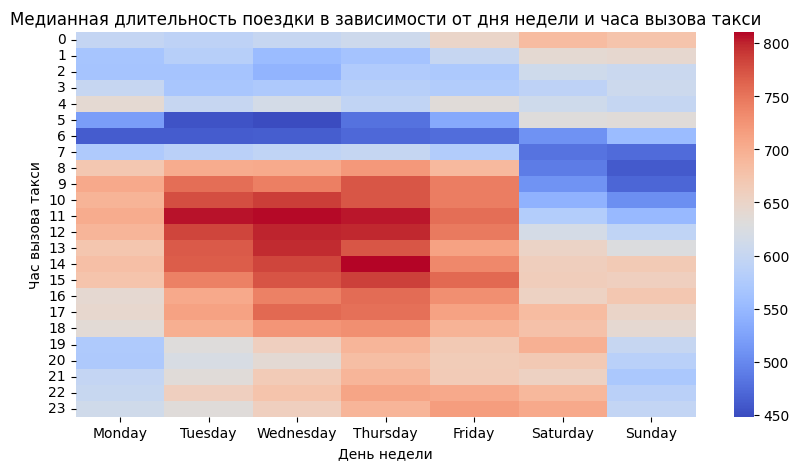

In [131]:
# создание сводной таблицы
pivot_table = pd.pivot_table(data, values="trip_duration", index="pickup_hour", columns="pickup_day_of_week", aggfunc="median")

# сортировка дней недели в сводной таблице
pivot_table = pivot_table.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# построение тепловой карты
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table, cmap="coolwarm")
plt.title("Медианная длительность поездки в зависимости от дня недели и часа вызова такси")
plt.xlabel("День недели")
plt.ylabel("Час вызова такси")
plt.show()

#A Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.
#B Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.


### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.


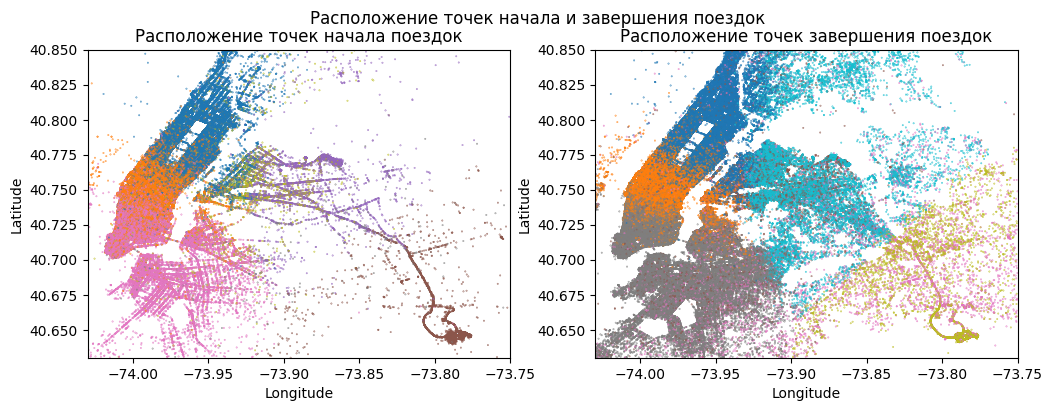

In [132]:

# Определим границы города Нью-Йорк
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Определим размер точек на диаграмме рассеяния
point_size = 0.1

# Создадим две scatter-диаграммы
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

# Диаграмма 1: начало поездок
pickup_data = data.loc[(data['pickup_longitude'] >= city_long_border[0]) & (data['pickup_longitude'] <= city_long_border[1]) & (data['pickup_latitude'] >= city_lat_border[0]) & (data['pickup_latitude'] <= city_lat_border[1])]
ax[0].scatter(pickup_data['pickup_longitude'], pickup_data['pickup_latitude'], s=point_size, c=pickup_data['geo_cluster'], cmap='tab10')
ax[0].set_title('Расположение точек начала поездок')

# Диаграмма 2: конец поездок
dropoff_data = data.loc[(data['dropoff_longitude'] >= city_long_border[0]) & (data['dropoff_longitude'] <= city_long_border[1]) & (data['dropoff_latitude'] >= city_lat_border[0]) & (data['dropoff_latitude'] <= city_lat_border[1])]
ax[1].scatter(dropoff_data['dropoff_longitude'], dropoff_data['dropoff_latitude'], s=point_size, c=dropoff_data['geo_cluster'], cmap='tab10')
ax[1].set_title('Расположение точек завершения поездок')

# Установим границы осей абсцисс и ординат
ax[0].set_xlim(city_long_border)
ax[0].set_ylim(city_lat_border)
ax[1].set_xlim(city_long_border)
ax[1].set_ylim(city_lat_border)

# Добавим метки осей и заголовок
fig.suptitle('Расположение точек начала и завершения поездок')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

# Отобразим диаграммы
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


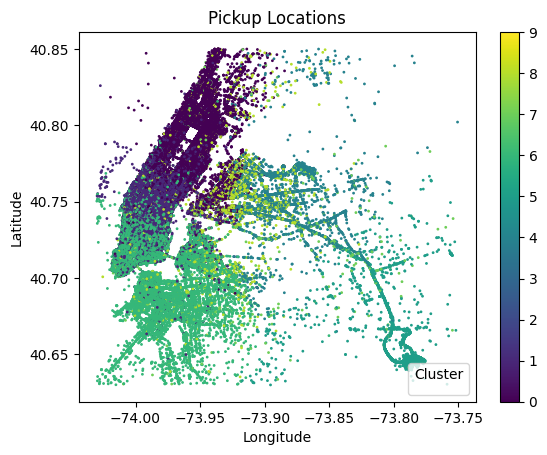

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


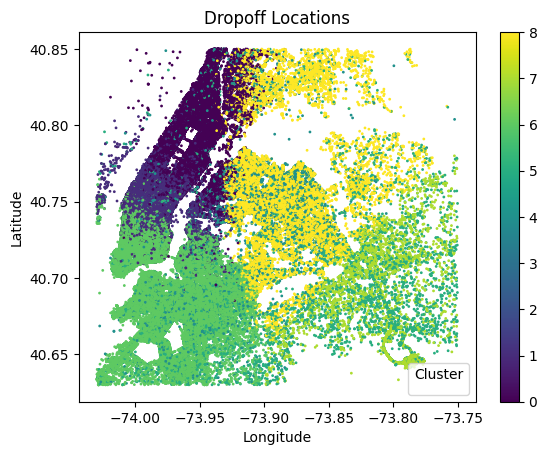

In [133]:
# Определяем границы Нью-Йорка
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Отбираем точки, которые находятся в пределах Нью-Йорка
pickup_points = data.loc[(data['pickup_longitude'] >= city_long_border[0]) & (data['pickup_longitude'] <= city_long_border[1]) & (data['pickup_latitude'] >= city_lat_border[0]) & (data['pickup_latitude'] <= city_lat_border[1])]
dropoff_points = data.loc[(data['dropoff_longitude'] >= city_long_border[0]) & (data['dropoff_longitude'] <= city_long_border[1]) & (data['dropoff_latitude'] >= city_lat_border[0]) & (data['dropoff_latitude'] <= city_lat_border[1])]

# Создаем scatter-диаграмму для pickup_points
plt.scatter(pickup_points['pickup_longitude'], pickup_points['pickup_latitude'], c=pickup_points['geo_cluster'], cmap='viridis', s=1)
plt.colorbar()
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='lower right')
plt.show()

# Создаем scatter-диаграмму для dropoff_points
plt.scatter(dropoff_points['dropoff_longitude'], dropoff_points['dropoff_latitude'], c=dropoff_points['geo_cluster'], cmap='viridis', s=1)
plt.colorbar()
plt.title('Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='lower right')
plt.show()


In [134]:
# Определим количество уникальных значений в столбце geo_cluster для всего набора данных
all_clusters = data['geo_cluster'].nunique()

# Определим количество уникальных значений в столбце geo_cluster для каждой из двух scatter-диаграмм
pickup_clusters = pickup_data['geo_cluster'].nunique()
dropoff_clusters = dropoff_data['geo_cluster'].nunique()

#выберем наибольшее количество кластеров из диаграмм
num_clusters = max(pickup_clusters, dropoff_clusters)

# Вычислим количество кластеров, которые не были отображены на диаграммах
missing_clusters = all_clusters - num_clusters

# Выведем результат
print(f"Количество кластеров, которые не были отображены на диаграммах: {missing_clusters}")


Количество кластеров, которые не были отображены на диаграммах: 2


### Задание 3.8.
Построим график распределения количества пассажиров по дням недели

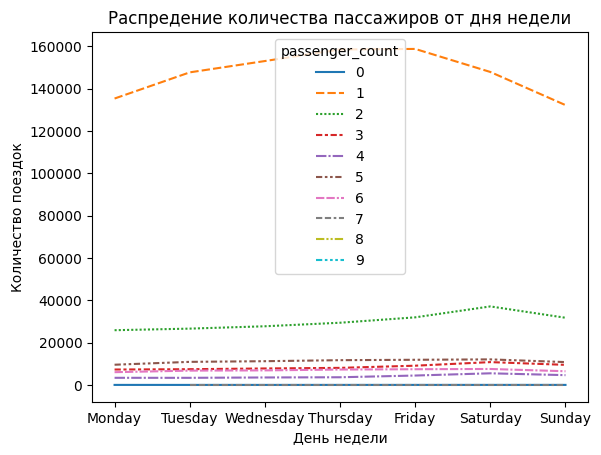

In [135]:
# создание сводной таблицы
pivot_table = data.pivot_table(index='pickup_day_of_week', columns='passenger_count', values='id', aggfunc='count')

# сортировка дней недели
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# создание графика
sns.lineplot(data=pivot_table)
plt.title('Распредение количества пассажиров от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.show()

### Задание 3.9.
Построим график распределения количества поездок по поставщику услуг

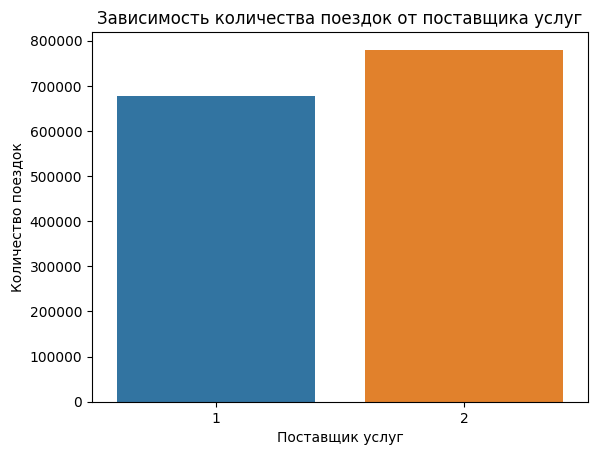

In [136]:
# группировка данных по поставщику услуг и подсчет количества поездок
trips_by_vendor = data.groupby('vendor_id')['id'].count().reset_index()

# построение графика
sns.barplot(x='vendor_id', y='id', data=trips_by_vendor)
plt.title('Зависимость количества поездок от поставщика услуг')
plt.xlabel('Поставщик услуг')
plt.ylabel('Количество поездок')
plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [137]:
print('Shape of data: {}'.format(data.shape))
print('Columns: {}'.format(data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [138]:
train_data = data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,0,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,6,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,6,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,6,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,0,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [139]:
drop_columns = ['id', 'dropoff_datetime']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 25)


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [140]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [141]:
# закодировать признак vendor_id
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)

# закодировать признак store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [142]:
print('Cреднее по закодированному столбцу vendor_id {}'.format(round(train_data['vendor_id'].mean(), 2)))
print('среднее по закодированному столбцу store_and_fwd_flag {}'.format(round(train_data['store_and_fwd_flag'].mean(), 3)))

Cреднее по закодированному столбцу vendor_id 0.53
среднее по закодированному столбцу store_and_fwd_flag 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events.


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [143]:
# выбор признаков для кодирования
features = ['pickup_day_of_week', 'geo_cluster', 'events']

# создание объекта OneHotEncoder
encoder = OneHotEncoder(drop='first')

# кодирование признаков
encoded_features = encoder.fit_transform(train_data[features])

# получение имен закодированных столбцов
encoded_feature_names = encoder.get_feature_names_out(features)

# преобразование numpy-массива в DataFrame
data_onehot = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names)

In [144]:
data_onehot.head()

,pickup_day_of_week_Monday,pickup_day_of_week_Saturday,pickup_day_of_week_Sunday,pickup_day_of_week_Thursday,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [145]:
data_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458233 entries, 0 to 1458232
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   pickup_day_of_week_Monday     1458233 non-null  float64
 1   pickup_day_of_week_Saturday   1458233 non-null  float64
 2   pickup_day_of_week_Sunday     1458233 non-null  float64
 3   pickup_day_of_week_Thursday   1458233 non-null  float64
 4   pickup_day_of_week_Tuesday    1458233 non-null  float64
 5   pickup_day_of_week_Wednesday  1458233 non-null  float64
 6   geo_cluster_1                 1458233 non-null  float64
 7   geo_cluster_2                 1458233 non-null  float64
 8   geo_cluster_3                 1458233 non-null  float64
 9   geo_cluster_4                 1458233 non-null  float64
 10  geo_cluster_5                 1458233 non-null  float64
 11  geo_cluster_6                 1458233 non-null  float64
 12  geo_cluster_7               

Добавим полученную таблицу с закодированными признаками:

In [146]:
#train_data = pd.concat(
#    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot],
#    axis=1
#)


train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(features, axis=1), data_onehot],
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [147]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [148]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [149]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977016 entries, 293850 to 121958
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     977016 non-null  int64  
 1   passenger_count               977016 non-null  int64  
 2   pickup_longitude              977016 non-null  float64
 3   pickup_latitude               977016 non-null  float64
 4   dropoff_longitude             977016 non-null  float64
 5   dropoff_latitude              977016 non-null  float64
 6   store_and_fwd_flag            977016 non-null  int64  
 7   pickup_hour                   977016 non-null  int64  
 8   pickup_holiday                977016 non-null  float64
 9   total_distance                977016 non-null  float64
 10  total_travel_time             977016 non-null  float64
 11  number_of_steps               977016 non-null  float64
 12  haversine_distance            977016 no

In [150]:
from sklearn.feature_selection import SelectKBest, f_regression

In [151]:
selector = SelectKBest(score_func=f_regression, k=25)    #зададим параметры для модели отбора признаков
selector.fit(X_train, y_train_log)    #обучим модель

#best_col= list(selector.get_feature_names_out())
#best_col    #выведим список лучших 15 признаков

SelectKBest(k=25, score_func=<function f_regression at 0x28006f740>)

In [152]:
best_col= list(selector.get_feature_names_out())
best_col    #выведим список лучших 25 признаков

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_hour',
 'pickup_holiday',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine_distance',
 'temperature',
 'pickup_day_of_week_Monday',
 'pickup_day_of_week_Saturday',
 'pickup_day_of_week_Sunday',
 'pickup_day_of_week_Thursday',
 'pickup_day_of_week_Tuesday',
 'pickup_day_of_week_Wednesday',
 'geo_cluster_1',
 'geo_cluster_4',
 'geo_cluster_5',
 'geo_cluster_7',
 'geo_cluster_8']

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [153]:
#!!! выберем наилучшие признаки
X_train = pd.DataFrame(X_train, columns = best_col).astype(np.float64)
X_valid = pd.DataFrame(X_valid, columns = best_col).astype(np.float64)

In [154]:
scaler = preprocessing.MinMaxScaler()    #инициализируем стандартизацию
scaler.fit(X_train)     #обучим алгоритм
X_train_scaled = scaler.transform(X_train)   #выведем нормализованные данные
X_valid_scaled = scaler.transform(X_valid)

In [155]:
round(X_valid_scaled[:, 0].mean(), 2)

0.54

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [156]:
X_train_scaled[:1]

array([[1.        , 0.71428571, 0.79168868, 0.64074576, 0.79155852,
        0.73243349, 0.        , 0.73913043, 0.        , 0.0111383 ,
        0.02028986, 0.02272727, 0.00124244, 0.71881188, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [157]:
y_train_log.info()

<class 'pandas.core.series.Series'>
Int64Index: 977016 entries, 293850 to 121958
Series name: trip_duration_log
Non-Null Count   Dtype  
--------------   -----  
977016 non-null  float64
dtypes: float64(1)
memory usage: 14.9 MB


In [158]:
y_train_log_int = y_train_log.astype(np.int64)
y_valid_log_int = y_valid_log.astype(np.int64)

In [159]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LinearRegression()   #max_iter = 1000,random_state=42   .LinearRegression LogisticRegression
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train_log_int)
#print("accuracy на тестовом наборе: {:.2f}".format(log_reg.score(X_valid_scaled, y_valid_log_int)))
y_valid_log_pred = log_reg.predict(X_valid_scaled)
y_train_log_pred = log_reg.predict(X_train_scaled)
#print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_valid_log_int, y_valid_log_pred)))

In [160]:
#from regressionmetrics.metrics import *
from sklearn.metrics import make_scorer, mean_squared_log_error, mean_squared_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))   #!!!mean_squared_log_error

In [ ]:
print(round(rmsle(y_valid_log_int,y_valid_log_pred),2))
print(round(rmsle(y_train_log_int,y_train_log_pred),2))
#rmsle(X_valid_scaled, y_valid_log_int)

# y_train_log, y_valid_log
#верный 0.54

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [162]:
# #Инициализируем стандартизатор StandardScaler
# scaler = preprocessing.StandardScaler()
# #Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
# scaler.fit(X_train)
# #Производим стандартизацию тренировочной выборки
# X_train_scaled = scaler.transform(X_train)
# #Производим стандартизацию тестовой выборки
# X_valid_scaled = scaler.transform(X_valid)
# #Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_valid_scaled_poly = poly.transform(X_valid_scaled)
#Выводим результирующие размерности таблиц
print(X_train_scaled_poly.shape)
print(X_valid_scaled_poly.shape)
# # (977016, 350)
# # (481217, 350)
#

(977016, 350)
(481217, 350)


In [163]:
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_train_scaled_poly, y_train_log_int)

LinearRegression()

In [164]:
y_valid_poly_pred = poly_reg.predict(X_valid_scaled_poly)
y_train_poly_pred = poly_reg.predict(X_train_scaled_poly)

In [165]:
print(round(rmsle(y_valid_log_int,y_valid_poly_pred),2))
print(round(rmsle(y_train_log_int,y_train_poly_pred),2))

0.68
0.55


In [166]:
# # Создание объекта PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
#
# # Генерация полиномиальных признаков
# poly.fit(X_train_scaled)
# X_train_poly = poly.transform(X_train_scaled)
# X_valid_poly = poly.transform(X_valid_scaled)

In [167]:
# poly_reg = linear_model.LinearRegression()
# poly_reg.fit(X_train_poly, y_train_log_pred)

In [168]:
# y_valid_poly_pred = poly_reg.predict(X_valid_poly)
# y_train_poly_pred = poly_reg.predict(X_train_poly)

In [169]:
# print(round(rmsle(y_valid_log_int,y_valid_poly_pred),2))
# print(round(rmsle(y_train_log_int,y_train_poly_pred),2))

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [170]:
regr1 = DecisionTreeRegressor(random_state=42)
regr1.fit(X_train_scaled, y_train_log_int)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred1 = regr1.predict(X_valid_scaled)
y_pred2 = regr1.predict(X_train_scaled)

#print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print('rmsle на тренировочном наборе: {:.2f}'.format(round(rmsle(y_train_log_int,y_pred2),2)))
print('rmsle на тестовом наборе: {:.2f}'.format(round(rmsle(y_valid_log_int,y_pred1),2)))

#0
#0.57

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


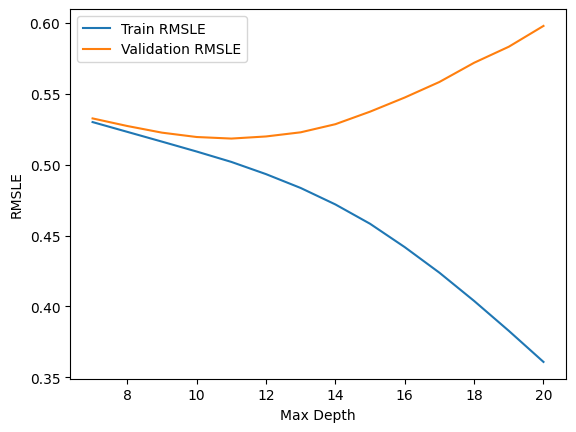

In [172]:
depths = range(7, 21)
train_RMSLE = []
val_RMSLE = []

for depth in depths:
    # Создаем модель дерева решений
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    # Обучаем модель на тренировочной выборке
    model.fit(X_train_scaled, y_train_log_int)
    # Получаем предсказания на тренировочной и валидационной выборках
    y_train_log_int_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_valid_scaled)
    # Вычисляем RMSLE на тренировочной и валидационной выборках
    train_RMSLE.append(rmsle(y_train_log_int, y_train_log_int_pred))
    val_RMSLE.append(rmsle(y_valid_log_int, y_val_pred))

# Строим графики изменения метрики RMSLE на тренировочной и валидационной выборках
plt.plot(depths, train_RMSLE, label='Train RMSLE')
plt.plot(depths, val_RMSLE, label='Validation RMSLE')
plt.xlabel('Max Depth')
plt.ylabel('RMSLE')
plt.legend()
plt.show()

In [173]:
model = DecisionTreeRegressor(max_depth=12, random_state=42)
# Обучаем модель на тренировочной выборке
model.fit(X_train_scaled, y_train_log_int)
# Получаем предсказания на тренировочной и валидационной выборках
y_train_log_int_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_valid_scaled)
# Вычисляем RMSLE на тренировочной и валидационной выборках

In [ ]:
print('rmsle на тренировочном наборе: {:.2f}'.format(round(rmsle(y_train_log_int,y_train_log_int_pred),2)))
print('rmsle на тестовом наборе: {:.2f}'.format(round(rmsle(y_valid_log_int,y_val_pred),2)))

#0.41
#0.43

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [175]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Создаем модель случайного леса
model = RandomForestRegressor(n_estimators=200, max_depth=12, criterion='squared_error', min_samples_split=20, random_state=42)

# Обучаем модель на тренировочной выборке
model.fit(X_train_scaled, y_train_log_int)

# Получаем предсказания на тренировочной и валидационной выборках
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_valid_scaled)

# Вычисляем RMSLE на тренировочной и валидационной выборках
print('rmsle на тренировочном наборе: {:.2f}'.format(round(rmsle(y_train_log_int,y_train_pred),2)))
print('rmsle на тестовом наборе: {:.2f}'.format(round(rmsle(y_valid_log_int,y_val_pred),2)))

#0.4
#0.41

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)
gb.fit(X_train_scaled, y_train_log_int)

y_train_pred = gb.predict(X_train_scaled)
y_val_pred = gb.predict(X_valid_scaled)

#print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

In [ ]:
print('rmsle на тренировочном наборе: {:.2f}'.format(round(rmsle(y_train_log_int,y_train_pred),2)))
print('rmsle на тестовом наборе: {:.2f}'.format(round(rmsle(y_valid_log_int,y_val_pred),2)))

#0.37
#0.39

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Получение значимости каждого из факторов
feature_importances = gb.feature_importances_

# Создание датафрейма с названиями факторов и их значимостью
feature_importances_df = pd.DataFrame({'feature': best_col, 'importance': feature_importances})

# Сортировка факторов по значимости
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
from sklearn.metrics import median_absolute_error

In [ ]:
y_train_true = np.exp(y_train_log_int) - 1
y_train_true_pred = np.exp(y_train_pred) - 1
y_valid_true = np.exp(y_valid_log_int) - 1
y_valid_true_pred = np.exp(y_val_pred) - 1

In [ ]:
print('MeAE на тренировочном наборе: {:.2f}'.format(round(median_absolute_error(y_train_true,y_train_true_pred),1)))
print('MeAE на тестовом наборе: {:.2f}'.format(round(median_absolute_error(y_valid_true, y_valid_true_pred),1)))

#1.8

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Project5_test_data.csv")
osrm_data_test = pd.read_csv("/content/drive/MyDrive//Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holidays)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)

In [ ]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((test_data[['pickup_latitude', 'pickup_longitude']],
                    test_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

In [ ]:
def add_cluster_features(data, kmeans):
    X = coords
    # Добавляем столбец с кластерами в DataFrame
    data['geo_cluster'] = kmeans.predict(X)
    return data

test_data = add_cluster_features(test_data, kmeans)

In [ ]:
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [ ]:
#features
one_hot_encoder = OneHotEncoder()
test_data_onehot = one_hot_encoder.fit_transform(test_data[features]).toarray()
#column_names = OneHotEncoder.get_feature_names_out(features)

In [ ]:
column_names = one_hot_encoder.get_feature_names_out(features)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(features, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[best_col]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

In [ ]:
y_test_predict = gb.predict(X_test_scaled)

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [178]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9,
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1,
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

## оформление


НУЖНО ОФОРМИТЬ В КАГЛе концовку

2 хороших решения

https://www.kaggle.com/code/au1206/nyc-taxi-duration-prediction-using-xgboost/notebook#DATA-VISUALIZATION

https://www.kaggle.com/code/dmtamm/nyc-taxi-russian